In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import digits
from nltk.tokenize import RegexpTokenizer
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping 
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from nltk.corpus import stopwords
import nltk
# nltk.download('words')

Using TensorFlow backend.
c:\users\eisha\anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\eisha\anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\eisha\anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\eisha\anaconda3\envs\venv\lib\site-packag

In [2]:
token = RegexpTokenizer("[\w']+")
sw = stopwords.words('english')
words = set(nltk.corpus.words.words())
# sw

In [3]:
def get_datasets(): 
    columnLabels = ['country', 'id', 'title', 'c1', 'c2', 'c3', 'description', 'price', 'type']
    train = pd.read_csv("data_train.csv", names=columnLabels, encoding = 'utf16')
    test = pd.read_csv("data_test.csv", names=columnLabels)
#     train.column = test.column = columnLabels
    return train, test

In [4]:
def preprocess_twoCol(dataframe):
    
    df = pd.DataFrame()
    #tokenize and convert to lower case
    dataframe['title'] = dataframe['title'].apply(lambda x: token.tokenize(x.lower()))
    #stopword removal
    dataframe['title'] = dataframe['title'].apply(lambda x: ' '.join([w for w in x if w not in sw]))
    #remove punctuations and other symbols
    dataframe['title'] = dataframe['title'].apply(lambda x: [w for w in nltk.wordpunct_tokenize(x)\
                                                             if w in words is not w.isalpha() and not w.isnumeric()])
    #remove digits
    dataframe['title'] = dataframe['title'].apply(lambda x: [w.translate({ord(k): None for k in digits}) for w in x])
    #remove single length words
    dataframe['title'] = dataframe['title'].apply(lambda x: ' '.join([w for w in x if len(w)>1]))
    
    df['title'] = dataframe['title'].values
    df['c1'] = dataframe['c1'].values
    
    maxlen = df.title.map(lambda x: len(token.tokenize(x))).max() # find length of longest product title (with max words)
    print(maxlen)
 
    return df


def get_categories():  
    return
    

30
AxesSubplot(0.125,0.125;0.775x0.755)


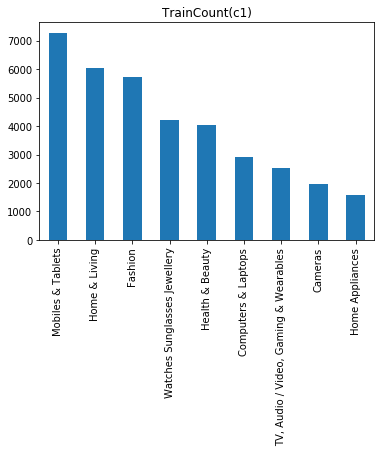

In [5]:
train_df, test_df = get_datasets()
tCol_df = preprocess_twoCol(train_df)
print(train_df.c1.value_counts().plot(kind='bar', title='TrainCount(c1)'))

In [6]:
tCol_df

title  \
0                              gallery square light pink   
1                                  heartbreaker de spray   
2      dual headed directional microphone collar clip...   
3                complaint silky set shampoo conditioner   
4                                   green clay face body   
...                                                  ...   
36278  led wired mechanical gaming keyboard blue blac...   
36279                                      electric oven   
36280  portable wireless speaker free plus edge one p...   
36281                                  pillow case white   
36282  new smart wristband smart bracelet heart rate ...   

                                          c1  
0                                    Fashion  
1                            Health & Beauty  
2      TV, Audio / Video, Gaming & Wearables  
3                            Health & Beauty  
4                            Health & Beauty  
...                                      ...  
36278                    Computers & Laptops  
36279                        Home Appliances  
36280                    Computers & Laptops  
36281                          Home & Living  
36282  TV, Audio / Video, Gaming & Wearables  

[36283 rows x 2 columns]

In [23]:
maxWords = 10000
MaxWordLength = tCol_df.title.map(lambda x: len(token.tokenize(x))).max()
embeddingDimensions = 100  # what izzz
tokenizer = Tokenizer(num_words = maxWords, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(tCol_df['title'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7994 unique tokens.


In [27]:
word_index.keys()

dict_keys(['black', 'case', 'cover', 'white', 'watch', 'leather', 'fashion', 'men', 'blue', 'phone', 'export', 'new', 'set', 'red', 'galaxy', 'gold', 'silver', 'bag', 'camera', 'led', 'cable', 'back', 'color', 'casual', 'pink', 'plus', 'steel', 'apple', 'light', 'card', 'green', 'multicolor', 'free', 'pu', 'charger', 'holder', 'hard', 'adapter', 'long', 'high', 'stainless', 'flip', 'wireless', 'wallet', 'soft', 'wall', 'dress', 'screen', 'stand', 'waterproof', 'slim', 'strap', 'quartz', 'home', 'glass', 'portable', 'shirt', 'size', 'digital', 'sleeve', 'power', 'car', 'smart', 'protector', 'brown', 'hair', 'protective', 'style', 'silicone', 'pattern', 'plastic', 'inch', 'battery', 'drive', 'metal', 'box', 'ultra', 'bracelet', 'rose', 'micro', 'design', 'sports', 'crystal', 'dual', 'band', 'necklace', 'purple', 'wrist', 'sexy', 'storage', 'body', 'full', 'mobile', 'quality', 'flower', 'note', 'yellow', 'short', 'flash', 'air', 'shoulder', 'grey', 'pro', 'cotton', 'neck', 'sport', 'clear

In [28]:
# print(test_df.c1.value_counts().plot(kind='bar', title='TestCount(c1)'))
MaxWordLength

30

In [29]:
train_X = tokenizer.texts_to_sequences(tCol_df['title'].values)
train_X = tf.keras.preprocessing.sequence.pad_sequences(train_X, maxlen=MaxWordLength)

print('Shape of data tensor:', train_X.shape)

Shape of data tensor: (36283, 30)


In [30]:
train_X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 3415,  271,   29,   25])

In [31]:
train_Y = pd.get_dummies(tCol_df['c1']).values  # one hot encoding
print('Shape of label tensor:', train_Y.shape)

Shape of label tensor: (36283, 9)


In [32]:
train_Y[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [33]:
tCol_df['c1'][0]

'Fashion'

In [ ]:
model = Sequential()
model.add(Embedding(maxWords, embeddingDimensions, input_length=train_X.shape[1]))
# model.add(SpatialDropout1D(0.2))
model.add(LSTM(1000, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

epochs = 5
batch_size = 64

history = model.fit(train_X, train_Y, epochs=epochs, batch_size=batch_size, \
                    validation_split=0.1,\
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 30, 100)           1000000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 1000)              4404000   
_________________________________________________________________
dense_11 (Dense)             (None, 128)               128128    
_________________________________________________________________
dense_12 (Dense)             (None, 9)                 1161      
Total params: 5,533,289
Trainable params: 5,533,289
Non-trainable params: 0
_________________________________________________________________
Train on 32654 samples, validate on 3629 samples
Epoch 1/5
32654/32654 [==============================] - 989s 30ms/step - loss: 0.7822 - accuracy: 0.7438 - val_loss: 0.4051 - val_accuracy: 0.8799
Epoch 2/5
16192/32654 [=============>........

In [ ]:
accs=history.history['accuracy']
val_accs=history.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()

In [ ]:
history.history